# Common import and setup


In [1]:
import os, sys, time, pytest

import matplotlib.pyplot as plt
from matplotlib import patches, lines
import numpy as np
import pandas as pd
from pandas.testing import assert_frame_equal

import pdfminer

from IPython.display import display

# Make sure we use the local version of camelot if it is here
sys.path.insert(0, os.path.abspath(''))

import camelot
from camelot.core import Table, TableList, TextEdges
from camelot.__version__ import generate_version
from camelot.utils import get_text_objects, text_in_bbox
from camelot.parsers.stream import Stream
from camelot.parsers.hybrid import Hybrid
from camelot.handlers import PDFHandler
from camelot.plotting import draw_pdf
from tests.data import *

testdir = os.path.dirname(os.path.abspath('.'))
testdir = os.path.join(testdir, "camelot/tests/files")

# Set up plots to be large enough for visualization

# To check which library we're using
camelot.__file__


'/Users/francoishuet/Code/camelot/camelot/__init__.py'

In [2]:
kwargs = {}
data = None
# pdf_file = "vertical_header.pdf"  # test_hybrid_vertical_header
# pdf_file, kwargs = "background_lines_1.pdf", {} # {"process_background": True}  # test_lattice_process_background

# pdf_file, kwargs, data = "superscript.pdf", {"flag_size": True}, data_stream_flag_size # test_hybrid_flag_size
# pdf_file = "health.pdf"  # test_hybrid
# pdf_file = "clockwise_table_2.pdf"
# pdf_file = "tabula/12s0324.pdf"  # interesting because contains two separate tables
# pdf_file, kwargs = "tabula/us-007.pdf", {"table_regions": ["320,335,573,505"]} # test_hybrid_table_regions
# pdf_file, kwargs = "tabula/us-007.pdf", {"table_areas": ["320,500,573,335"]} # test_hybrid_table_areas
# pdf_file, kwargs = "detect_vertical_false.pdf", {"strip_text": " ,\n"}  # data_stream_strip_text
# pdf_file, kwargs, data = "tabula/m27.pdf", {"columns": ["72,95,209,327,442,529,566,606,683"], "split_text": True, }, data_stream_split_text  # data_stream_split_text
# pdf_file = "clockwise_table_2.pdf"  # test_hybrid_table_rotated / test_stream_table_rotated
# pdf_file = "vertical_header.pdf"

# pdf_file = "twotables_2.pdf"
pdf_file = "camelot-issue-132-multiple-tables.pdf"
# pdf_file, kwargs, data = "edge_tol.pdf", {"edge_tol": 500}, data_stream_edge_tol
# pdf_file, kwargs, data = "edge_tol.pdf", {}, data_stream_edge_tol

filename = os.path.join(testdir, pdf_file)

Found 2 tables (7x4, 3x3) in 0.18s


,0,1,2,3
0,1,Ghfhbdhj,1,
1,Vgvhgh,Hj,Hj,Hj
2,Hj,Hj,Hj,Hj
3,Hj,Hj,J,Hj
4,V,C,D,Gfhj
5,Hjb,B,Jhbh,Hj
6,Hjdhshj,Hjhjhh,Ddnj,dsxv


,0,1,2
0,Trtrt,H,Gh
1,Gh,V,Hv
2,Hv,Bhjb,hg


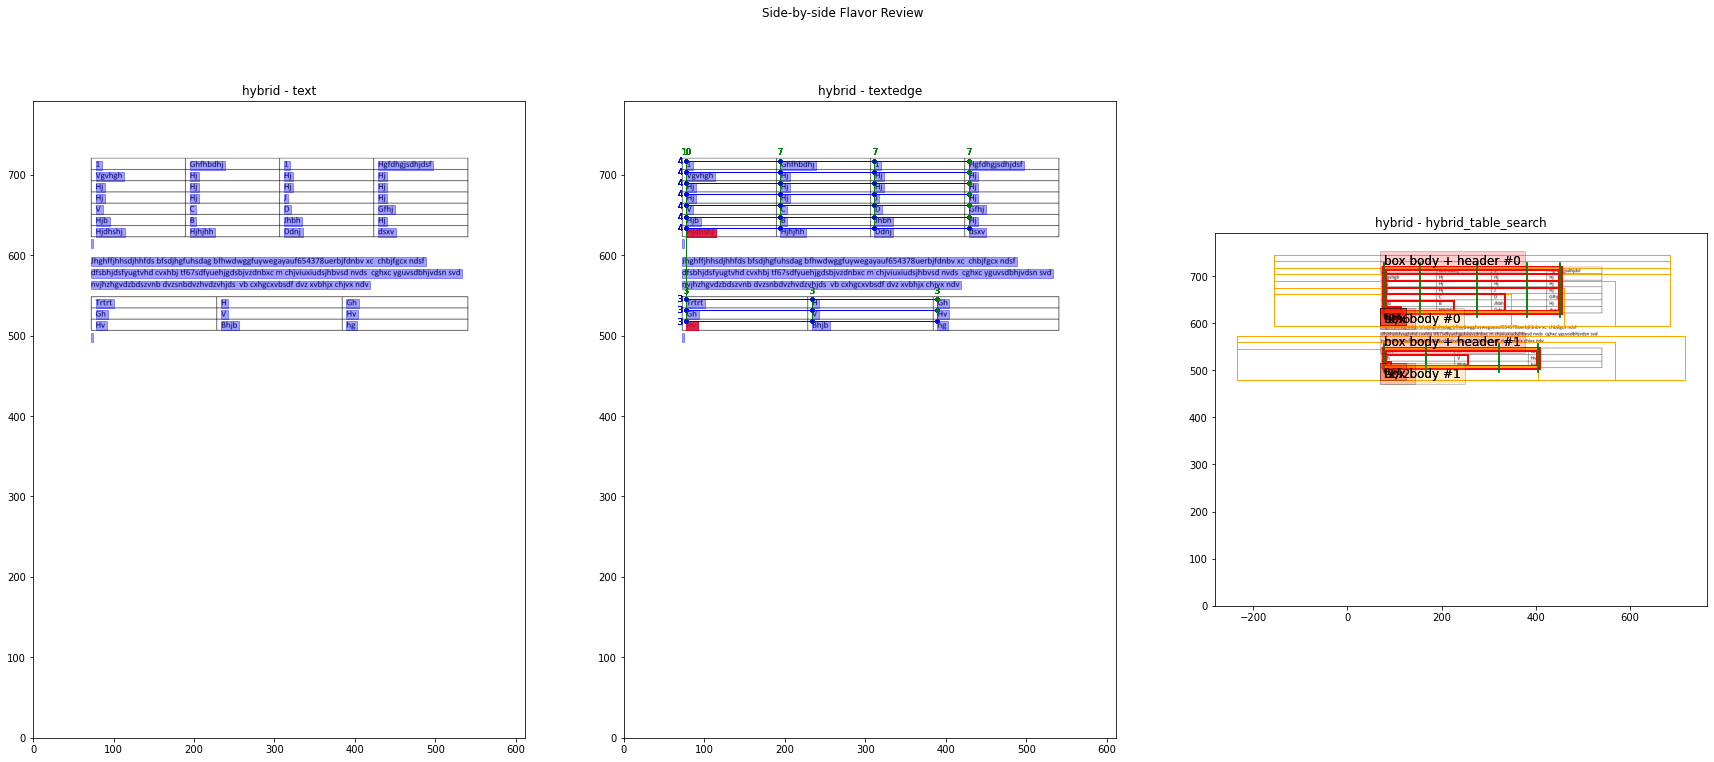

In [3]:

PLOT_TYPES = ["text", "textedge", "hybrid_table_search"]
PLOT_HEIGHT = 12
plt.rcParams["figure.figsize"] = [PLOT_HEIGHT * 2.5, PLOT_HEIGHT]
fig, axes = plt.subplots(1, len(PLOT_TYPES))
fig.suptitle('Side-by-side Flavor Review')
tables_list = []
flavor = "hybrid"
timer_before_parse = time.perf_counter()
tables = camelot.read_pdf(filename, flavor=flavor, debug=True, **kwargs)
tables_list.append(tables)
timer_after_parse = time.perf_counter()

if len(tables):
    tables_dims = ", ".join(
        map(
            lambda table: "{rows}x{cols}".format(
                rows=table.shape[0],
                cols=table.shape[1],
            ), tables
        )
    )
    print("Found {table_num} tables ({tables_dims}) in {parse_time:.2f}s".format(
        table_num=len(tables),
        tables_dims=tables_dims,
        parse_time=timer_after_parse - timer_before_parse,
    ))
    for table in tables:
        display(table.df)
        for plot_idx, plot_id in enumerate(PLOT_TYPES):
            ax = axes[plot_idx]
            fig = camelot.plot(table, kind=plot_id, ax=ax)
            ax.set_title("{flavor} - {plot_id}".format(
                flavor=flavor,
                plot_id=plot_id,
            ))

timer_after_plot = time.perf_counter()
fig


In [4]:
tables = camelot.read_pdf(filename, flavor='stream')
fig = camelot.plot(tables[0], kind='text')


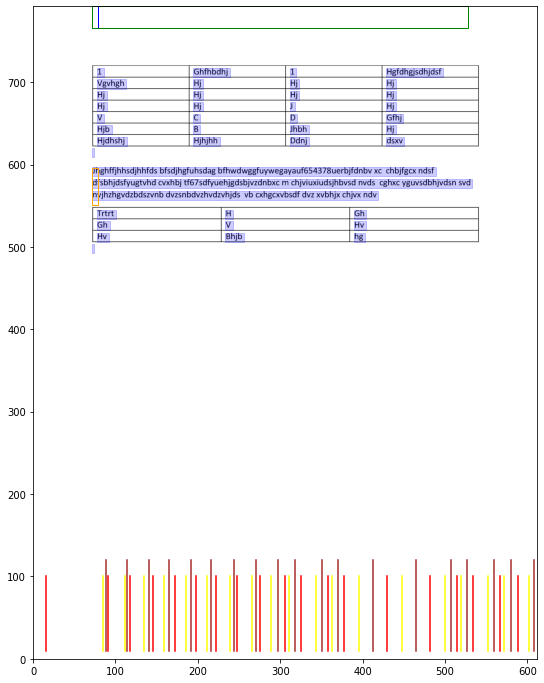

In [5]:
ax = fig.add_subplot(111, aspect="equal")

def add_rectangle(ax, bbox, color):
    ax.add_patch(
        patches.Rectangle(
            (bbox[0], bbox[1]), bbox[2] - bbox[0], bbox[3] - bbox[1],
            fill=False, color=color
        )
    )

add_rectangle(ax, (71.039971584, 766.039693584, 78.46358609455301, 792.439683024), "blue") # most aligned
add_rectangle(ax, [71.039971584, 766.039693584, 528.2376647048496, 792.439683024], "green") # current bbox
add_rectangle(ax, (71.039971584, 550.759779696, 78.46358609455301, 595.879761648), "orange") # t considered

col_bounds = [[15.110600000000002, 85.17270800000026], [91.35392000000013, 111.20462000000025], [117.41954000000024, 135.20402000000024], [145.73642000000024, 159.08282000000023], [171.77798000000024, 185.12438000000023], [197.81954000000025, 211.16594000000023], [221.57774000000023, 239.36222000000024], [247.61930000000024, 265.4037800000002], [275.87192000000005, 289.2825800000003], [306.4158200000003, 310.88606000000027], [325.73594000000026, 343.52042000000023], [358.4989400000002, 362.96918000000016], [377.81906000000015, 395.6035400000001], [429.90218000000016, 447.68666000000013], [481.98530000000017, 499.76978000000014], [514.7483000000002, 519.2185400000002], [534.0684200000002, 551.8529000000002], [566.8314200000002, 571.3016600000002], [588.37064, 601.7813000000002], [614.4282800000001, 627.8228600000002], [640.5180200000002, 653.8644800000004], [666.5033000000001, 679.9059800000002], [692.6011400000002, 705.9556400000006], [718.6427000000002, 731.9891000000002]]
for bound in col_bounds:
    ax.plot(
        [bound[0], bound[0]],
        [10, 100],
        color="red",
    )
for bound in col_bounds:
    ax.plot(
        [bound[1], bound[1]],
        [10, 100],
        color="yellow",
    )
col_splits = [88.2633140000002, 114.31208000000024, 140.47022000000024, 165.43040000000025, 191.47196000000025, 216.37184000000025, 243.49076000000025, 270.6378500000001, 297.8492000000003, 318.31100000000026, 351.00968000000023, 370.39412000000016, 412.75286000000017, 464.8359800000002, 507.25904000000014, 526.6434800000002, 559.3421600000001, 579.8361500000001, 608.1047900000001, 634.1704400000002, 660.1838900000002, 686.2535600000002]
for col_split in col_splits:
    ax.plot(
        [col_split, col_split],
        [10, 120],
        color="brown",
    )
fig
